This notebook is part of a series. The notebooks in the series are:

- <a href="https://www.kaggle.com/code/sambitmukherjee/watson-1-eda-model-validation-schemes" target="_blank">Watson 1: EDA & Model Validation Schemes</a>
- This notebook.
- More to be added...

# Data Import

We'll read in the training and validation sets created in the previous notebook (<a href="https://www.kaggle.com/code/sambitmukherjee/watson-1-eda-model-validation-schemes" target="_blank">Watson 1: EDA & Model Validation Schemes</a>).

First, let's read in the training set.

In [1]:
import pandas as pd
from pathlib import Path

pd.set_option('display.max_colwidth', 0)
path = Path('/kaggle/input/watson-1-eda-model-validation-schemes')
train_df = pd.read_csv(path/'train_df.csv')
train_df

,id,premise,hypothesis,lang_abv,language,label
0,1af42d1159,"Das Büro des Staatsanwalts oder der Richter lehnte es ab, das Gericht der Vereinigten Staaten betreffend die Überwachung der Auslandsgeheimdienste könnte die Beantragung eines FISA-Haftbefehls ablehnen, weil die Agenten einen letzten Anlauf gegen die Strafverfolgung versuchten.","Das FISA-Gericht weist etwa die Hälfte der Haftungsanträge zurück, die sie erhalten.",de,German,1
1,5828c89e19,now that's an interesting point yeah i mean once the expectations are,That is one of the most interesting things about it.,en,English,1
2,158b01101d,"The elements of this example, repeated across millions of individual tasks, encapsulates the difference between an advanced industrial economy with a high standard of living and a less developed country with a low standard of living.",This example includes no elements of developed and developed economies.,en,English,2
3,7bfa8a5feb,"Filmin bahsetmeyi ihmal ettiği şey, Kaufman'ın kendi ölümünün nasıl üstesinden gelmek istediği hakkında sık sık konuşmuş olmasıydı.",Filmde Kaufman'ın kendi ölümünü değerlendirmesine yer verilmemektedir.,tr,Turkish,0
4,baf9f0ea77,اس طرح، پی پی جب اعلی حراستی میں ہے،یہ اس کا اپنا دوبارہ ترکیب روکنا ہے.,جب پی پی ایک اعلی ارتکاز رکھتی ہے تو یہ دوبارہ آمیزش کو بڑھا دیتی ہے۔,ur,Urdu,2
...,...,...,...,...,...,...
9079,df335f3399,Οι πωλήσεις εισιτηρίων και οι συνδρομές δεν μπορούν να χρηματοδοτήσουν όλη την περίοδό μας.,Για τη χρηματοδότηση της πλήρους σεζόν μας χρειάζονται περισσότερα από απλώς πωλήσεις εισιτηρίων και συνδρομές.,el,Greek,0
9080,47eb163ca1,"I saw that a faint streak of daylight was showing through the curtains of the windows, and that the clock on the mantelpiece pointed to close upon five o'clock.","I saw that daylight was coming, and heard the people waking up.",en,English,1
9081,6188687170,LASNNY is one of the oldest and most cost-effective legal services organizations in the United States.,LASNNY is an old legal services organization in Los Angeles.,en,English,1
9082,0dd28fd9c8,"During his disastrous campaign in Russia, he found time in Moscow to draw up a new statute for the Com??die-Francaise (the national theater), which had been dissolved during the Revolution.",Napoleon led the invasion.,en,English,1


The training set has 9,084 rows.

Next, let's read in the validation set.

In [2]:
val_df = pd.read_csv(path/'val_df.csv')
val_df

,id,premise,hypothesis,lang_abv,language,label
0,09b4fcf9d0,"Хотя я и сейчас не понимаю, как он вообще мог ожидать, что я это сделаю.","Я не понимаю, почему он думал, что я это доделаю.",ru,Russian,0
1,ccafb35842,Будущее грозит проблемами для SAT.,"В SAT нет времени, и в будущем не будет никаких проблем.",ru,Russian,2
2,d323519cda,"Кроме того, резиденты штата Индиана могут получить налоговые льготы с помощью налогового вычета, осуществляемого напрямую из итоговой суммы налоговых поступлений штата.",Жители штата Индиана получают 50% налоговый кредит если они делают пожертвования в театр.,ru,Russian,1
3,5cabd580f4,"Его рука сомкнулась на прикладе одного из пистолетов, который ему швырнули.","Он вооружился, поскольку собирался проникнуть в еще более опасную часть города.",ru,Russian,1
4,3788391ba2,"Это скалистая территория, где фермер по имени Лавер спрятался среди валунов от желающих его убить.",У Ловера на голове была мишень и ему пришлось спрятаться меж камней.,ru,Russian,0
...,...,...,...,...,...,...
3031,5c9bb4dc2c,RPH kitabının yayınlanması ile ilgili bir sonraki gerçeğe yol açan kitap turu izler.,Onun için ayırtılabilecek bir tur yoktu.,tr,Turkish,2
3032,ada7c6260e,"Bir İç Çember üyesi olarak, dünyanın en büyük demokrasi kutlaması olan 52. Amerikan Başkanı Göreve Başlama Töreni için tören alanındaki en iyi koltuklardan bazılarını bekleyebilirsiniz.",Amerika Başkanlık Töreni dünyanın en büyük demokrasi kutlaması sayılmaktadır.,tr,Turkish,0
3033,8368b31d96,"Bu şekilde, bir sözcüğün yazımı çoğu kez aynı paradigmaya veya kendi tarihine ait başka kelimelerle ilgilidir.",Bir kelimenin yazılışı onun tarihine bağlıdır.,tr,Turkish,0
3034,e76350a2e7,"Farklı, tamamen farklı paraşütler ve saatte 22.000 milden fazla sesin üç katı olan bir kuş.",Jet saatte 20.000 mil uçar.,tr,Turkish,1


The validation set has 3,036 rows.

We'll also read in the test set.

In [3]:
path = Path('/kaggle/input/contradictory-my-dear-watson')
test_df = pd.read_csv(path/'test.csv')
test_df

,id,premise,hypothesis,lang_abv,language
0,c6d58c3f69,بکس، کیسی، راہیل، یسعیاہ، کیلی، کیلی، اور کولمبین ہائی اسکول کے دوسرے طلبا کے نام سے بکسوں کو نشان زد کیا جائے گا جس نے اس سال پہلے اپنی زندگی کھو دی,"کیسی کے لئے کوئی یادگار نہیں ہوگا, کولمین ہائی اسکول کے طالب علموں میں سے ایک جو مر گیا.",ur,Urdu
1,cefcc82292,هذا هو ما تم نصحنا به.,عندما يتم إخبارهم بما يجب عليهم فعله ، فشلت الإدارة في السماح لنا بالدخول إلى الأسرار التجارية.,ar,Arabic
2,e98005252c,et cela est en grande partie dû au fait que les mères prennent de la drogue,Les mères se droguent.,fr,French
3,58518c10ba,与城市及其他公民及社区组织代表就IMA的艺术发展进行对话&amp,IMA与其他组织合作，因为它们都依靠共享资金。,zh,Chinese
4,c32b0d16df,Она все еще была там.,"Мы думали, что она ушла, однако, она осталась.",ru,Russian
...,...,...,...,...,...
5190,5f90dd59b0,نیند نے وعدہ کیا کہ موٹل نے سوال میں تحقیق کی.,نیمیتھ کو موٹل کی تفتیش کے لئے معاوضہ دیا جارہا ہے۔,ur,Urdu
5191,f357a04e86,The rock has a soft texture and can be bought in a variety of shapes.,The rock is harder than most types of rock.,en,English
5192,1f0ea92118,她目前的存在，并考虑到他与沃佛斯顿争执的本质，那是尴尬的。,她在与Wolverstone的打斗结束后才在场的事实被看作是很尴尬的。,zh,Chinese
5193,0407b48afb,isn't it i can remember i've only been here eight years but i can remember coming to work from i used to live in Wylie and i could see downtown Dallas,I could see downtown Dallas from where I lived in Wylie.,en,English


The test set has 5,195 rows.

# Baseline 1: Always Choosing the Majority Class

Class distribution in the training set:

In [4]:
train_df['label'].value_counts()

0    3131
2    3047
1    2906
Name: label, dtype: int64

We see that class `0` (`'entailment'`) is the majority class.

In this baseline, our strategy will be to always predict the majority class. Let's do that.

In [5]:
import numpy as np

preds_val = np.zeros(shape=val_df['label'].shape)

Accuracy score:

In [6]:
from sklearn.metrics import accuracy_score

accuracy_score(val_df['label'], preds_val)

0.3442028985507246

Let's see if we can improve the accuracy in the next baseline.

# Baseline 2: Naive Bayes with Bag-of-Characters

If this dataset was comprised of English texts only, we could have built a bag-of-words model. But in languages such as Chinese, the concept of a *word* isn't well defined. However, we can try building a bag-of-characters model.

Our bag-of-characters needs to include the characters in both the `'premise'` and `'hypothesis'` columns. Additionally, we would like to provide our model the information in the `'language'` column.

So let's create a new column (`'text'`) by concatenating the `'language'`, `'premise'` and `'hypothesis'` columns.

In [7]:
train_df['text'] = train_df['language'] + " " + train_df['premise'] + " " + train_df['hypothesis']
val_df['text'] = val_df['language'] + " " + val_df['premise'] + " " + val_df['hypothesis']

We'll use scikit-learn's `CountVectorizer` to create our bag-of-characters. (We can tell it to create a bag-of-characters by changing the `analyzer` argument from its default value of `'word'` to `'char'`.)

First, let's create it for the training set.

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer='char')
X_train_counts = count_vect.fit_transform(train_df['text'])
type(X_train_counts)

scipy.sparse.csr.csr_matrix

Our bag-of-characters is a sparse matrix. Let's check its shape.

In [9]:
X_train_counts.shape

(9084, 1941)

It contains 1,941 characters. Let's take a look at the first ten rows and the first ten columns.

In [10]:
pd.DataFrame.sparse.from_spmatrix(X_train_counts[:10, :10])

,0,1,2,3,4,5,6,7,8,9
0,48,0,0,0,0,0,0,0,0,0
1,22,0,0,0,0,0,0,1,0,0
2,46,0,0,0,0,0,0,0,0,0
3,24,0,0,0,0,0,0,2,0,0
4,32,0,0,0,0,0,0,0,0,0
5,39,0,0,0,0,0,0,2,0,0
6,72,0,0,0,0,0,0,2,0,0
7,27,0,0,0,0,0,0,0,0,0
8,11,0,0,0,0,0,0,0,0,0
9,16,0,0,0,0,0,0,1,0,0


We see that our feature matrix is extremely sparse.

Next, let's create our bag-of-characters for the validation set.

In [11]:
X_val_counts = count_vect.transform(val_df['text'])
X_val_counts.shape

(3036, 1941)

Now, let's fit a Naive Bayes classifier on the training set, and obtain predictions on the validation set.

In [12]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train_counts, train_df['label'])
preds_val = clf.predict(X_val_counts)
preds_val.shape

(3036,)

Let's take a look at the first ten predictions.

In [13]:
preds_val[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Accuracy score:

In [14]:
accuracy_score(val_df['label'], preds_val)

0.35046113306982873

Pathetic! Our Naive Bayes classifier has performed almost as poorly as Baseline 1.

Let's try to improve it by tuning the `min_df` parameter of `CountVectorizer` (which controls the number of characters in the bag-of-characters). From the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html" target="_blank">documentation</a> of `CountVectorizer`:

> **min_df : *float in range [0.0, 1.0] or int, default=1***

> When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called *cut-off* in the literature. If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if `vocabulary` is not `None`.

In [15]:
min_dfs = [0.0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05]
for min_df in min_dfs:
    count_vect = CountVectorizer(analyzer='char', min_df=min_df)
    X_train_counts = count_vect.fit_transform(train_df['text'])
    X_val_counts = count_vect.transform(val_df['text'])
    clf = MultinomialNB()
    clf.fit(X_train_counts, train_df['label'])
    preds_val = clf.predict(X_val_counts)
    acc = accuracy_score(val_df['label'], preds_val)
    print(f"Value of `min_df`: {min_df}")
    print(f"Number of characters in bag-of-characters: {X_train_counts.shape[1]}")
    print(f"Accuracy: {acc}")
    print("---")

Value of `min_df`: 0.0
Number of characters in bag-of-characters: 1941
Accuracy: 0.35046113306982873
---
Value of `min_df`: 0.001
Number of characters in bag-of-characters: 629
Accuracy: 0.35111989459815546
---
Value of `min_df`: 0.002
Number of characters in bag-of-characters: 459
Accuracy: 0.35111989459815546
---
Value of `min_df`: 0.003
Number of characters in bag-of-characters: 399
Accuracy: 0.35079051383399207
---
Value of `min_df`: 0.004
Number of characters in bag-of-characters: 358
Accuracy: 0.35177865612648224
---
Value of `min_df`: 0.005
Number of characters in bag-of-characters: 341
Accuracy: 0.35079051383399207
---
Value of `min_df`: 0.006
Number of characters in bag-of-characters: 328
Accuracy: 0.35210803689064557
---
Value of `min_df`: 0.007
Number of characters in bag-of-characters: 318
Accuracy: 0.35210803689064557
---
Value of `min_df`: 0.008
Number of characters in bag-of-characters: 307
Accuracy: 0.35243741765480896
---
Value of `min_df`: 0.009
Number of characters i

We see that `min_df=0.008` gives us the highest accuracy. Let's use it to train our final Naive Bayes model, and obtain predictions on the validation set.

In [16]:
count_vect = CountVectorizer(analyzer='char', min_df=0.008)
X_train_counts = count_vect.fit_transform(train_df['text'])
X_val_counts = count_vect.transform(val_df['text'])
clf = MultinomialNB()
clf.fit(X_train_counts, train_df['label'])
preds_val = clf.predict(X_val_counts)
preds_val.shape

(3036,)

Accuracy score:

In [17]:
accuracy_score(val_df['label'], preds_val)

0.35243741765480896

We've managed to marginally outperform Baseline 1.

Let's see if we can improve the accuracy in the next baseline.

# Baseline 3: XLM-RoBERTa as a Fixed Feature Extractor

Hugging Face Transformers tends to be very enthusiastic about showing lots of warnings. Let's quieten it down:

In [18]:
import warnings
import logging

warnings.simplefilter('ignore')
logging.disable(logging.WARNING)

In this baseline, we'll use the last hidden states of XLM-RoBERTa as fixed features and train a classifier on them, without modifying the pretrained model.

XLM-RoBERTa comes in two sizes: `"xlm-roberta-base"` and `"xlm-roberta-large"`. We'll use the former.

In [19]:
checkpoint = "xlm-roberta-base"

First, we'll download the tokenizer.

In [20]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(checkpoint)

Let's take a quick look at XLM-RoBERTa's special tokens and special IDs.

In [21]:
tokenizer.all_special_tokens

['<s>', '</s>', '<unk>', '<pad>', '<mask>']

In [22]:
tokenizer.all_special_ids

[0, 2, 3, 1, 250001]

Note that the `'<pad>'` token has ID `1`.

To efficiently encode our texts, we'll first convert our training & validation sets to Hugging Face `Dataset` objects.

In [23]:
from datasets import Dataset

train_ds = Dataset.from_pandas(train_df)
train_ds

Dataset({
    features: ['id', 'premise', 'hypothesis', 'lang_abv', 'language', 'label', 'text'],
    num_rows: 9084
})

In [24]:
val_ds = Dataset.from_pandas(val_df)
val_ds

Dataset({
    features: ['id', 'premise', 'hypothesis', 'lang_abv', 'language', 'label', 'text'],
    num_rows: 3036
})

We'll be obtaining the last hidden states of XLM-RoBERTa by performing forward passes on batches of encoded texts. To simplify this process, we'll tokenize our datasets with *global padding*, which will ensure that all the encoded texts have the same length.

In [25]:
def tokenize(batch):
    return tokenizer(batch['premise'], batch['hypothesis'], padding=True)

In [26]:
cols_to_remove = list(train_df.columns)
cols_to_remove.remove('label')
cols_to_remove

['id', 'premise', 'hypothesis', 'lang_abv', 'language', 'text']

First, the training set:

In [27]:
train_ds = train_ds.map(tokenize, batched=True, batch_size=None, remove_columns=cols_to_remove)
train_ds

  0%|          | 0/1 [00:00<?, ?ba/s]

Dataset({
    features: ['label', 'input_ids', 'attention_mask'],
    num_rows: 9084
})

**Note:** The combination of specifying `padding=True` in the call to `tokenizer()` and `batch_size=None` in the call to `map()` results in global padding.

Next, the validation set:

In [28]:
val_ds = val_ds.map(tokenize, batched=True, batch_size=None, remove_columns=cols_to_remove)
val_ds

  0%|          | 0/1 [00:00<?, ?ba/s]

Dataset({
    features: ['label', 'input_ids', 'attention_mask'],
    num_rows: 3036
})

Let's set the output format of the `Dataset` objects to `"torch"`, and examine the first couple of rows of the training set.

In [29]:
train_ds.set_format("torch")
val_ds.set_format("torch")
train_ds[:2]

{'label': tensor([1, 1]),
 'input_ids': tensor([[     0,   1858,  82781,    224,  83314, 206368,      7,   1367,    122,
          135430,   9570,   1479,    198,   1563,      4,    381,  83604,    122,
          231715,     19, 149225,    186,  99165,     71,     68,  16089,    634,
           38441,    122, 112269,      7,    429,   9491,  92169,  25482,     68,
          131806,  37398,   1619,   9026,    563,  36256,      9,   6495,   2480,
             372,   2242,   8266,      7,  19048,  96603,      4,  15887,     68,
           54603,     33,   1918,  22003,    893,  57985,  13228,     68, 115051,
             334, 146877,   1619,  88964,     33,      5,      2,      2,   1858,
             563,  36256,      9,  10429,  39334,    642,   1419,  29528,     68,
          140321,    122, 183044,   1462,  59953,     13,  15987,      4,     68,
            1329,  20991,      5,      2,      1,      1,      1,      1,      1,
               1,      1,      1,      1,      1,      1,  

Perfect.

Now, let's download the XLM-RoBERTa pretrained model, and move it to the GPU.

In [30]:
import torch
from transformers import AutoModel

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(checkpoint).to(device)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Let's write a function to extract the last hidden states associated with the `'<s>'` token. (**Note:** This token is equivalent to the `'[CLS]'` token in BERT.) For text classification, it is common practice to use just the hidden states associated with this token as the input features.

In [31]:
def extract_hidden_states(batch):
    # Place model inputs on the GPU:
    inputs = {k: v.to(device) for k, v in batch.items() if k in tokenizer.model_input_names}
    # Extract last hidden states:
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    # Return vectors for the '<s>' token:
    return {"hidden_state": last_hidden_state[:, 0].cpu().numpy()}

Finally, let's add the last hidden states to our `Dataset` objects using the `map()` method. (Since we're performing forward passes this time, we'll use a smaller batch size.)

In [32]:
train_ds = train_ds.map(extract_hidden_states, batched=True, batch_size=128)
train_ds

  0%|          | 0/71 [00:00<?, ?ba/s]

Dataset({
    features: ['label', 'input_ids', 'attention_mask', 'hidden_state'],
    num_rows: 9084
})

In [33]:
val_ds = val_ds.map(extract_hidden_states, batched=True, batch_size=128)
val_ds

  0%|          | 0/24 [00:00<?, ?ba/s]

Dataset({
    features: ['label', 'input_ids', 'attention_mask', 'hidden_state'],
    num_rows: 3036
})

We can now extract the `'hidden_state'` and `'label'` columns as NumPy arrays.

In [34]:
X_train = np.array(train_ds['hidden_state'])
y_train = np.array(train_ds['label'])
X_train.shape, y_train.shape

((9084, 768), (9084,))

In [35]:
X_val = np.array(val_ds['hidden_state'])
y_val = np.array(val_ds['label'])
X_val.shape, y_val.shape

((3036, 768), (3036,))

Let's use these to train a logistic regression model, and obtain predictions on the validation set.

In [36]:
from sklearn.linear_model import LogisticRegression

# We increase `max_iter` to guarantee convergence:
clf = LogisticRegression(max_iter=3000)
clf.fit(X_train, y_train)
preds_val = clf.predict(X_val)
preds_val.shape

(3036,)

Accuracy score:

In [37]:
accuracy_score(y_val, preds_val)

0.4670619235836627

We've managed to outperform Baseline 2.

Let's see if we can improve the accuracy in the next baseline.

# Baseline 4: "symanto/xlm-roberta-base-snli-mnli-anli-xnli"

Several open Natural Language Inference (NLI) datasets are available. Among these, the most popular multilingual one is <a href="https://arxiv.org/abs/1809.05053" target="_blank">Cross-Lingual NLI Corpus (XNLI)</a>.

I wanted to check if the <a href="https://huggingface.co/models" target="_blank">Hugging Face Hub</a> has any multilingual models that have been fine-tuned on the XNLI dataset. After searching on the Hub and then trying out a few, I found one that works quite well:

> https://huggingface.co/symanto/xlm-roberta-base-snli-mnli-anli-xnli

Let's use this model as is (i.e., without any fine-tuning) to obtain predictions on our validation set, and compute the accuracy score.

In [38]:
checkpoint = "symanto/xlm-roberta-base-snli-mnli-anli-xnli"

First, we'll download the tokenizer and model.

In [39]:
from transformers import AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

To easily obtain predictions on our validation set, we'll create a `Trainer` object.

In [40]:
from transformers import Trainer

trainer = Trainer(model, tokenizer=tokenizer)

Next, we'll convert our validation `DataFrame` to a Hugging Face `Dataset`.

In [41]:
val_ds = Dataset.from_pandas(val_df)
val_ds

Dataset({
    features: ['id', 'premise', 'hypothesis', 'lang_abv', 'language', 'label', 'text'],
    num_rows: 3036
})

We'll define a function to tokenize a batch of sequence pairs (where each sequence pair comprises a premise and a hypothesis).

In [42]:
def tokenize(batch):
    return tokenizer(batch['premise'], batch['hypothesis'])

Mapping this function to our entire validation set, we get:

In [43]:
val_ds = val_ds.map(tokenize, batched=True, remove_columns=list(val_df.columns))
val_ds

  0%|          | 0/4 [00:00<?, ?ba/s]

Dataset({
    features: ['input_ids', 'attention_mask'],
    num_rows: 3036
})

Finally, we'll obtain our validation set predictions.

In [44]:
preds_val = trainer.predict(val_ds).predictions.argmax(axis=-1)
preds_val.shape

(3036,)

Accuracy score:

In [45]:
accuracy_score(val_df['label'], preds_val)

0.9015151515151515

Among our four baselines, this model has by far the highest accuracy.

Let's understand the classes the model is struggling with by plotting a confusion matrix.

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(y_true, y_preds, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized Confusion Matrix")
    plt.show()

Description of the `normalize` parameter (from the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html" target="_blank">docs</a>):

> `normalize : {'true', 'pred', 'all'}`, default=`None`

> Normalizes confusion matrix over the true (rows, i.e., `axis=1`), predicted (columns, i.e., `axis=0`) conditions or all the population. If `None`, confusion matrix will not be normalized.

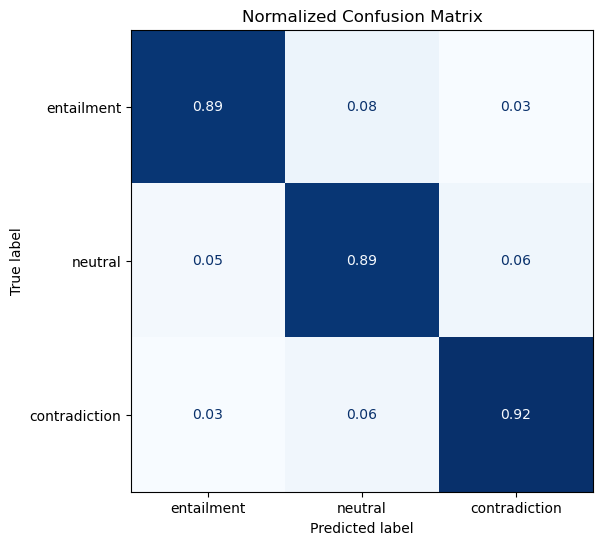

In [47]:
labels = ['entailment', 'neutral', 'contradiction']
plot_confusion_matrix(val_df['label'], preds_val, labels)

We see that the model most often confuses `'entailment'` with `'neutral'`.

# Test Set Predictions

Baseline 4 performed the best. Let's use it to obtain our test set predictions.

We can do this by simply repeating the steps we used for the validation set.

In [48]:
test_ds = Dataset.from_pandas(test_df)
test_ds = test_ds.map(tokenize, batched=True, remove_columns=list(test_df.columns))
preds_test = trainer.predict(test_ds).predictions.argmax(axis=-1)
preds_test.shape

  0%|          | 0/6 [00:00<?, ?ba/s]

(5195,)

Let's create our submission data frame.

In [49]:
submission = pd.DataFrame({'id': test_df['id'], 'prediction': preds_test})
submission

,id,prediction
0,c6d58c3f69,2
1,cefcc82292,1
2,e98005252c,0
3,58518c10ba,1
4,c32b0d16df,1
...,...,...
5190,5f90dd59b0,1
5191,f357a04e86,1
5192,1f0ea92118,0
5193,0407b48afb,0


Finally, let's save it to disk.

In [50]:
submission.to_csv('submission.csv', index=False)